In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

Solution for x'(0): 50.0


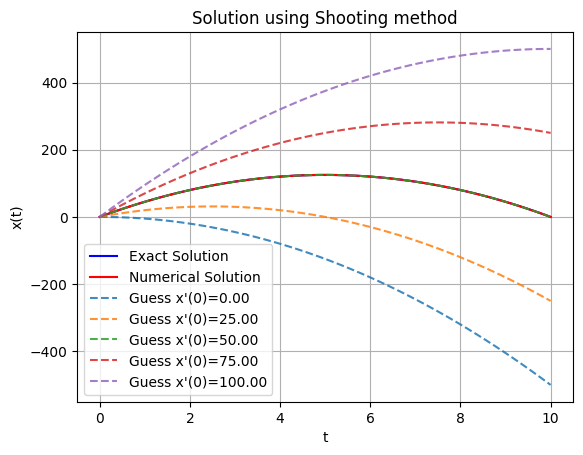

In [2]:
# f = d2x/dt2
def f(t, x, g):  
    return x[1], -g

# v = dx/dt
# function to solve the ODE with x(0) and x'(0) = v_guess
def solve_ode(x0, v_guess):
    t_range = [0, 10]      # t ranges from 0 to t1 = 10 
    initial_value = [x0, v_guess]
    t_evaluate = np.linspace(0, 10, 100)
    sol = solve_ivp(lambda t,x: f(t, x, 10), t_range, initial_value , t_eval = t_evaluate) 
    x = sol.y[0][-1]

    return x

# function to implement shooting method
def shooting_method(x0, beta, v_guesses):    # x = beta at t = t1

    errors = []

    for j in v_guesses:
        x_final = solve_ode(x0, j)
        error = abs(beta - x_final)
        errors.append(error)

    best_index = np.argmin(errors)
    return v_guesses[best_index]


# solve x'(0)
beta = 0   # x = 0 at t = t1 = 10
v_guesses = np.linspace(0, 100, 5)
v_sol = shooting_method(0, beta, v_guesses)
print("Solution for x'(0):", v_sol)

# Integrate the ODE system with the found y'(0)
g = 10
sol = solve_ivp(lambda t,x: f(t, x, g), [0, 10], [0, v_sol], t_eval=np.linspace(0, 10, 100))


# function for exact solution
def exact_sol(t):
    return -5*t**2 + 50*t

# exact solutions
t_values = np.linspace(0, 10, 100)
x_exact = exact_sol(t_values)

# Plot the exact the solution
plt.plot(t_values, x_exact, color = 'b', label = "Exact Solution")


# Plot the numerical solution using Shooting method
plt.plot(sol.t, sol.y[0], color = 'r', label = "Numerical Solution")


# Plot the candidate solutions
for v in v_guesses:
    candidate_sol = solve_ivp(lambda t,x: f(t, x, g), [0, 10], [0, v], t_eval=np.linspace(0, 10, 100))
    plt.plot(candidate_sol.t, candidate_sol.y[0], linestyle='--', alpha = 0.85, label=f"Guess x'(0)={v:.2f}")


plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()
plt.title("Solution using Shooting method")
plt.grid(True)
plt.show()